In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, color
from skimage.segmentation import watershed
from scipy import ndimage

def display_image(title, img, cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


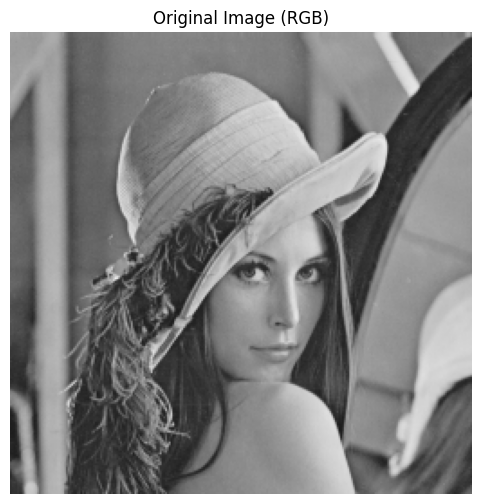

In [6]:
image_path = '/content/Image.png'
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

display_image("Original Image (RGB)", img_rgb)


In [7]:
height, width, channels = img_rgb.shape
total_pixels = height * width

print(f"Image Size: Width={width}, Height={height}, Channels={channels}")
print(f"Total Pixels: {total_pixels}")


Image Size: Width=256, Height=256, Channels=3
Total Pixels: 65536


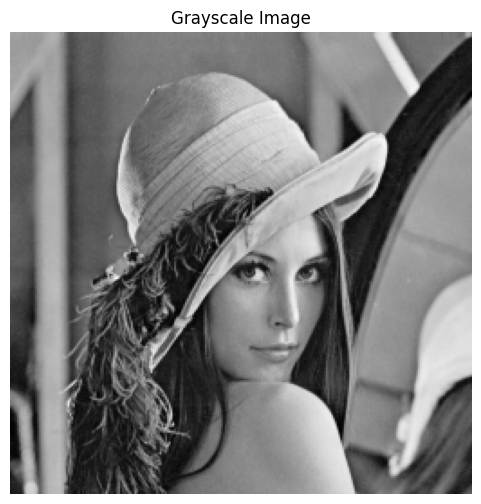

In [8]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
display_image("Grayscale Image", img_gray, cmap='gray')


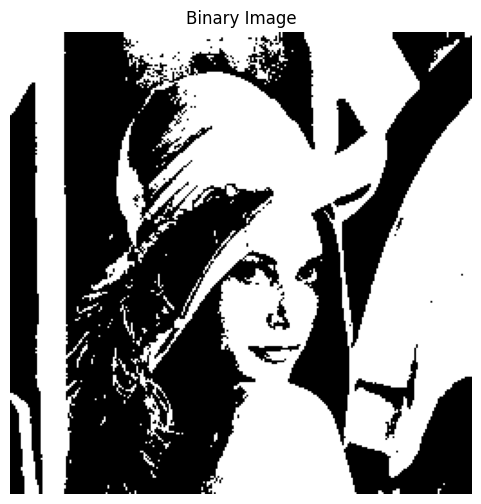

Number of Black Pixels: 32289


In [9]:
threshold_value, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
display_image("Binary Image", img_binary, cmap='gray')

black_pixel_count = np.sum(img_binary == 0)
print(f"Number of Black Pixels: {black_pixel_count}")


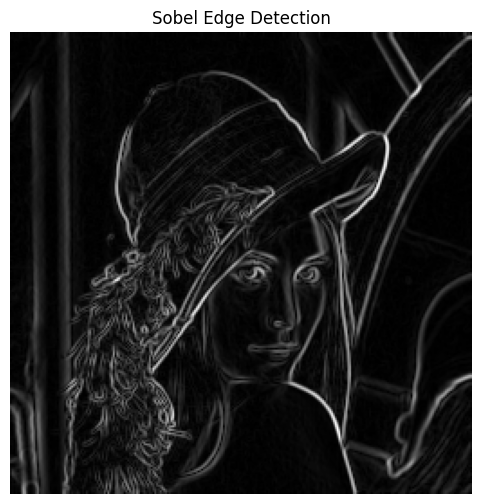

In [10]:
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

display_image("Sobel Edge Detection", sobel_combined, cmap='gray')


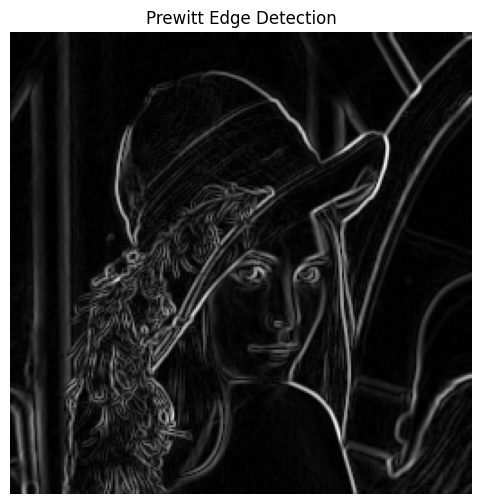

In [11]:
prewitt_x = filters.prewitt_h(img_gray)
prewitt_y = filters.prewitt_v(img_gray)
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)

display_image("Prewitt Edge Detection", prewitt_combined, cmap='gray')


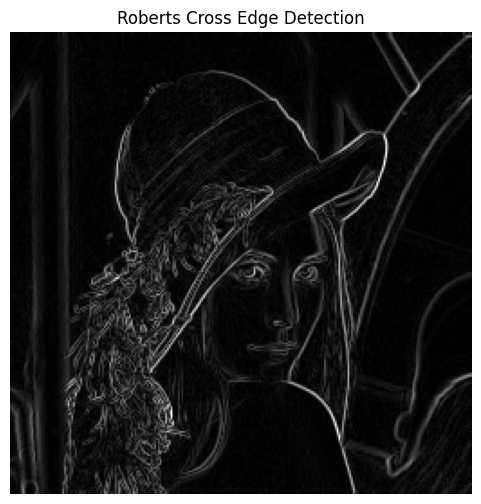

In [12]:
roberts = filters.roberts(img_gray)
display_image("Roberts Cross Edge Detection", roberts, cmap='gray')


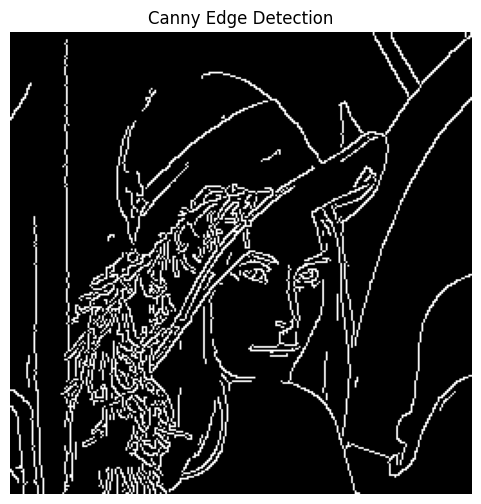

In [13]:
canny_edges = cv2.Canny(img_gray, 100, 200)
display_image("Canny Edge Detection", canny_edges, cmap='gray')


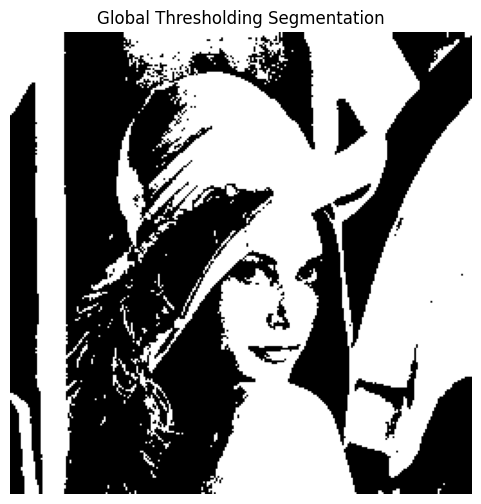

In [14]:
_, global_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
display_image("Global Thresholding Segmentation", global_thresh, cmap='gray')


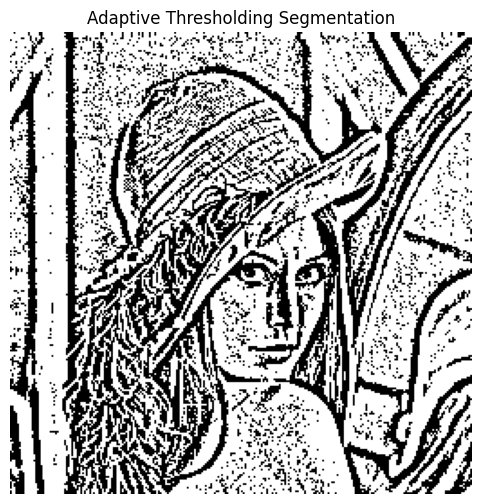

In [15]:
adaptive_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
display_image("Adaptive Thresholding Segmentation", adaptive_thresh, cmap='gray')


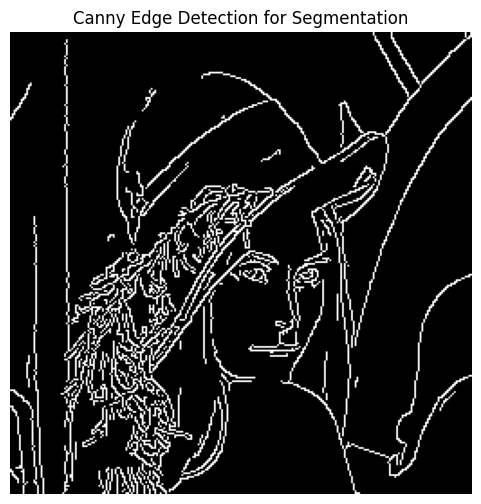

In [16]:
display_image("Canny Edge Detection for Segmentation", canny_edges, cmap='gray')


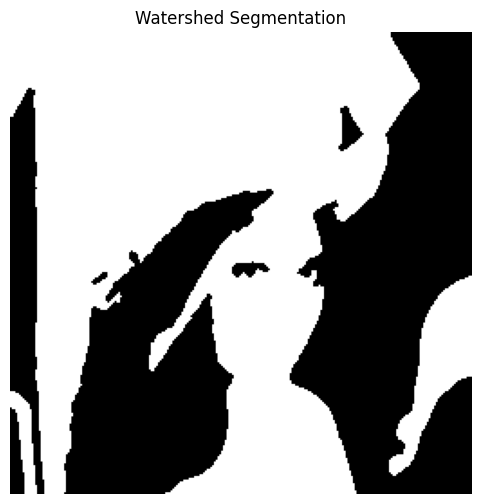

In [17]:
gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
gradient = filters.sobel(gray_blur)

markers = np.zeros_like(img_gray)
markers[img_gray < 50] = 1
markers[img_gray > 200] = 2

segmentation = watershed(gradient, markers)
display_image("Watershed Segmentation", segmentation, cmap='gray')
